# Queries


In [ ]:
import pandas as pd

# Assuming `pathway_activity_scores` is a pandas DataFrame with cells as index and pathways as columns.

# Global Expression Level Queries
def query_global_expression(dataframe, threshold, query_type='high'):
    """
    Query cells with high or low total pathway activity scores.

    :param dataframe: DataFrame containing pathway activity scores.
    :param threshold: Threshold value for total pathway activity score.
    :param query_type: 'high' for high expression, 'low' for low expression.
    :return: DataFrame of cells that meet the query condition.
    """
    total_scores = dataframe.sum(axis=1)
    if query_type == 'high':
        return dataframe.loc[total_scores >= threshold]
    elif query_type == 'low':
        return dataframe.loc[total_scores <= threshold]

# Pathway-Specific Expression Queries
def query_pathway_specific(dataframe, pathway_id, threshold, query_type='above'):
    """
    Query cells based on the expression level of a specific pathway.

    :param dataframe: DataFrame containing pathway activity scores.
    :param pathway_id: Specific pathway ID to query.
    :param threshold: Threshold value for pathway activity score.
    :param query_type: 'above' for scores above the threshold, 'below' for scores below.
    :return: DataFrame of cells that meet the query condition.
    """
    if query_type == 'above':
        return dataframe.loc[dataframe[pathway_id] >= threshold]
    elif query_type == 'below':
        return dataframe.loc[dataframe[pathway_id] <= threshold]

# Co-Expression Queries
def coexpression_query(dataframe, pathways_list, threshold, mode='above'):
    """
    Enhanced query for co-expression, where pathways must be simultaneously above or below a threshold.

    :param dataframe: DataFrame containing pathway activity scores.
    :param pathways_list: List of pathways to query.
    :param threshold: Numerical threshold for pathway activity.
    :param mode: 'above' for activity above the threshold, 'below' for below the threshold.
    :return: DataFrame of cells that meet the co-expression criteria.
    """
    if mode == 'above':
        mask = (dataframe[pathways_list] > threshold).all(axis=1)
    else:
        mask = (dataframe[pathways_list] < threshold).all(axis=1)
    return dataframe[mask]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the pathway activity scores DataFrame
pathway_activity_scores_healthy = pd.read_csv("/content/pathway_activity_scores_healthy.csv", index_col=0)
pathway_activity_scores_cancer = pd.read_csv("/content/pathway_activity_scores_cancer.csv", index_col=0)


In [ ]:
# Load the pathway acticity score for growth dataset
pathway_activity_scores_growth=pd.read_csv('/content/pathway_activity_scores.csv',index_col=0)

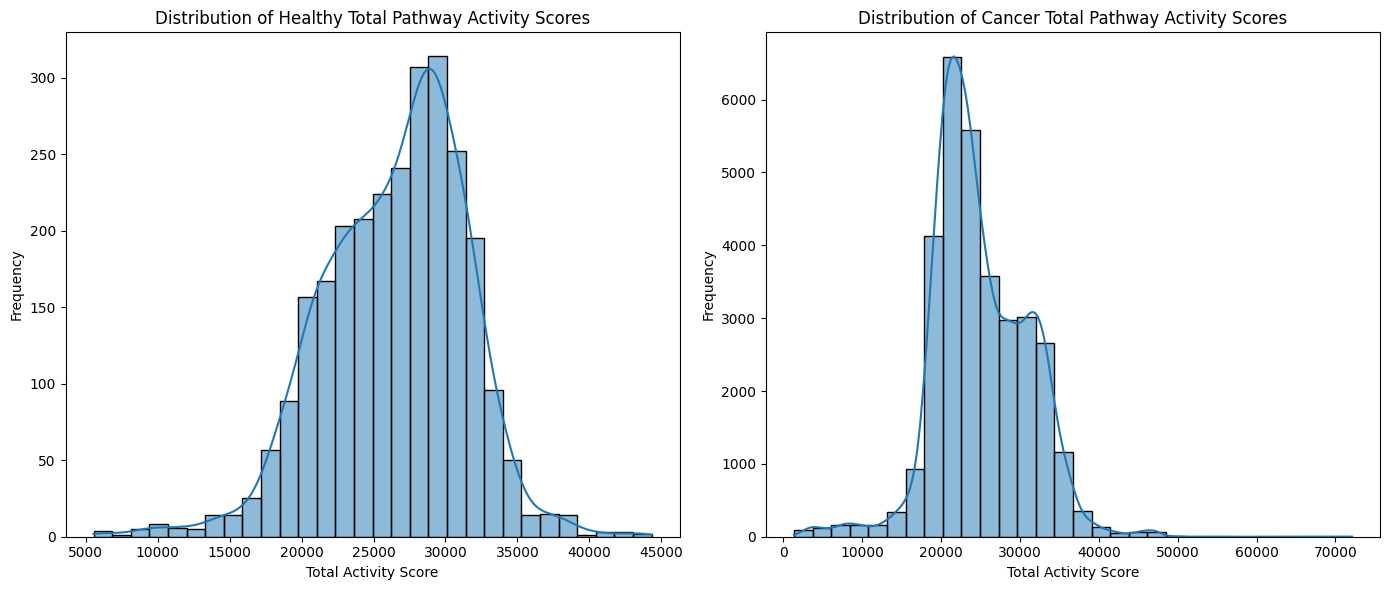

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total pathway activity scores for each cell
total_scores_healthy = pathway_activity_scores_healthy.sum(axis=1)
total_scores_cancer = pathway_activity_scores_cancer.sum(axis=1)

# Plotting both distributions side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting healthy scores
sns.histplot(total_scores_healthy, bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Healthy Total Pathway Activity Scores')
axs[0].set_xlabel('Total Activity Score')
axs[0].set_ylabel('Frequency')

# Plotting cancer scores
sns.histplot(total_scores_cancer, bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Cancer Total Pathway Activity Scores')
axs[1].set_xlabel('Total Activity Score')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Pathway score normalization

In [ ]:
cancer_avg=(total_scores_cancer/len(pathway_activity_scores_cancer.columns)).sum()/len(pathway_activity_scores_cancer)
healthy_avg=(total_scores_healthy/len(pathway_activity_scores_healthy.columns)).sum()/len(pathway_activity_scores_healthy)

In [ ]:
total_scores_growth = pathway_activity_scores_growth.sum(axis=1)
growth_avg=(total_scores_growth/len(pathway_activity_scores_growth.columns)).sum()/len(pathway_activity_scores_growth)

In [ ]:
print(growth_avg)
print(cancer_avg)
print(healthy_avg)

65.58371066643399
71.86390885236992
76.37423460985535


In [ ]:
# normaliza each dataset by its average pathway activity score
percent_cancer=pathway_activity_scores_cancer.sum()/(len(pathway_activity_scores_cancer)*cancer_avg)
percent_healthy=pathway_activity_scores_healthy.sum()/(len(pathway_activity_scores_healthy)*healthy_avg)

In [ ]:
percent_growth=pathway_activity_scores_growth.sum()/(len(pathway_activity_scores_growth)*growth_avg)

In [ ]:
# calculate the difference of each pathway in different dataset after normalization
diff=percent_cancer-percent_healthy

In [ ]:
diff_growth=percent_growth-percent_healthy

In [ ]:
diff_cg=percent_growth-percent_cancer

In [ ]:
# find the pathway most over or under expressed compared to healthy dataset
print(diff_cg.nlargest(5))
print(diff_cg.nsmallest(5))

hsa03010    8.306278
hsa05171    4.745735
hsa03271    1.238261
hsa03060    1.019124
hsa03040    0.812217
dtype: float64
hsa04216   -12.005836
hsa00860   -11.414624
hsa04978    -9.053378
hsa03260    -3.391835
hsa04217    -3.368606
dtype: float64


In [ ]:
print(diff.nlargest(5))
print(diff.nsmallest(10))

hsa03010    10.712016
hsa04216     8.115283
hsa00860     6.760362
hsa05171     6.310331
hsa04978     5.356604
dtype: float64
hsa05133   -1.668644
hsa04744   -1.481703
hsa03271   -1.450101
hsa05031   -0.936680
hsa04657   -0.855094
hsa03267   -0.805536
hsa04145   -0.762625
hsa05216   -0.659645
hsa04713   -0.628226
hsa04614   -0.622394
dtype: float64


In [ ]:
print(diff_growth.nlargest(5))
print(diff_growth.nsmallest(5))

hsa03010    19.018294
hsa05171    11.056067
hsa05110     1.347597
hsa05143     1.324370
hsa03060     0.930261
dtype: float64
hsa00860   -4.654262
hsa04216   -3.890553
hsa04978   -3.696774
hsa04612   -3.354231
hsa05133   -1.824273
dtype: float64


#Visualization

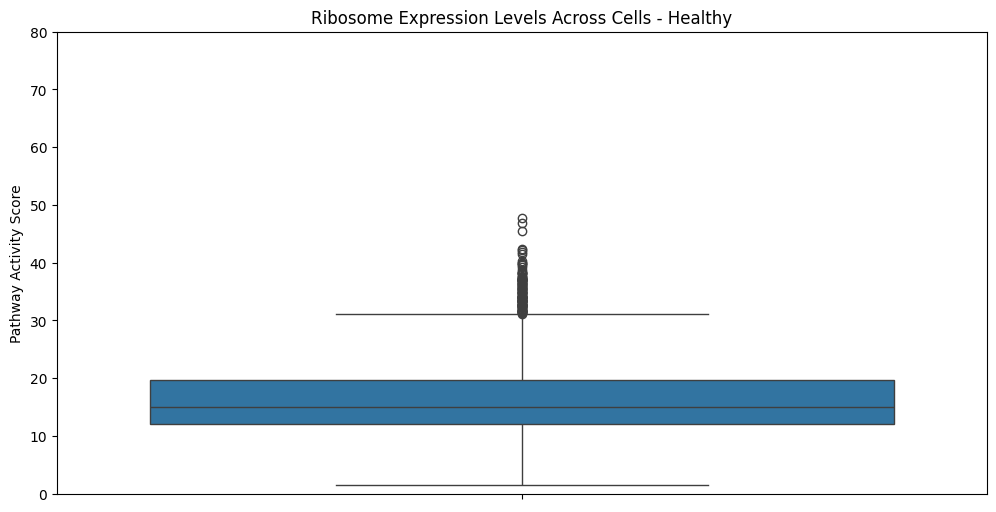

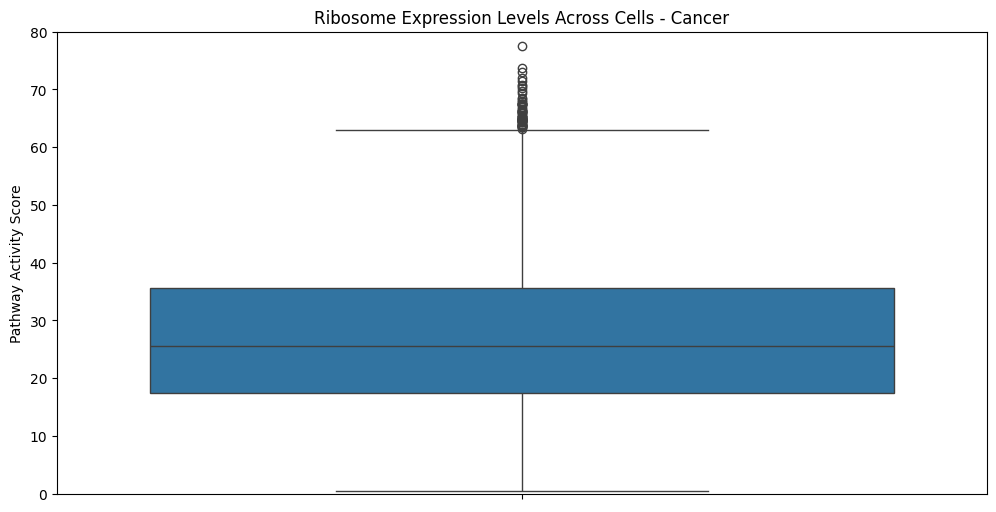

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of pathways to visualize
pathways_to_plot = pathway_activity_scores_healthy.columns[313:315]  # Adjust the slice as needed

# Plotting for Healthy dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=pathway_activity_scores_healthy['hsa03010']/healthy_avg)
plt.xticks(rotation=45)
plt.ylim((0,80))
plt.title('Ribosome Expression Levels Across Cells - Healthy')
plt.ylabel('Pathway Activity Score')
plt.show()

# Plotting for Cancer dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=pathway_activity_scores_cancer['hsa03010']/cancer_avg)
plt.xticks(rotation=45)
plt.ylim((0,80))
plt.title('Ribosome Expression Levels Across Cells - Cancer')
plt.ylabel('Pathway Activity Score')
plt.show()


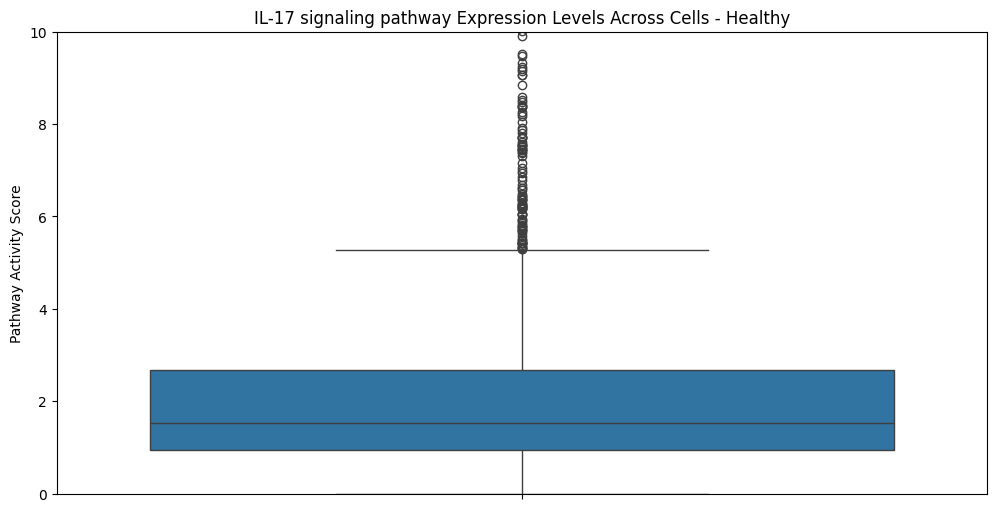

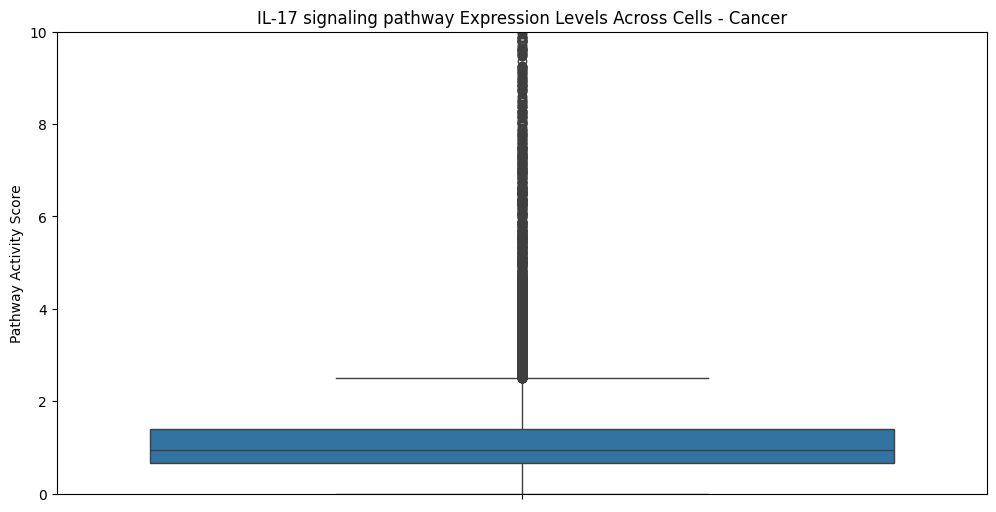

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of pathways to visualize
pathways_to_plot = pathway_activity_scores_healthy.columns[313:315]  # Adjust the slice as needed

# Plotting for Healthy dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=pathway_activity_scores_healthy['hsa04657']/healthy_avg)
plt.xticks(rotation=45)
plt.ylim((0,10))
plt.title('IL-17 signaling pathway Expression Levels Across Cells - Healthy')
plt.ylabel('Pathway Activity Score')
plt.show()

# Plotting for Cancer dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=pathway_activity_scores_cancer['hsa04657']/cancer_avg)
plt.xticks(rotation=45)
plt.ylim((0,10))
plt.title('IL-17 signaling pathway Expression Levels Across Cells - Cancer')
plt.ylabel('Pathway Activity Score')
plt.show()


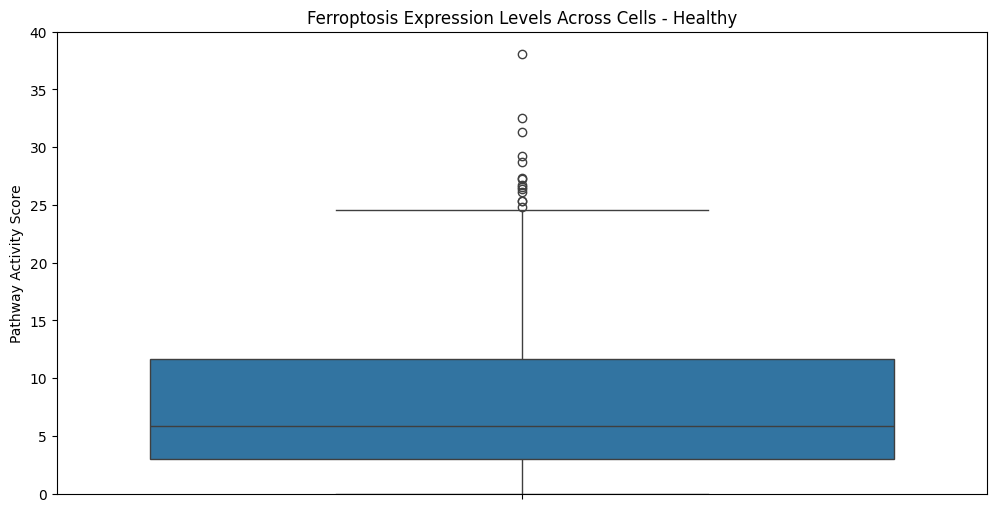

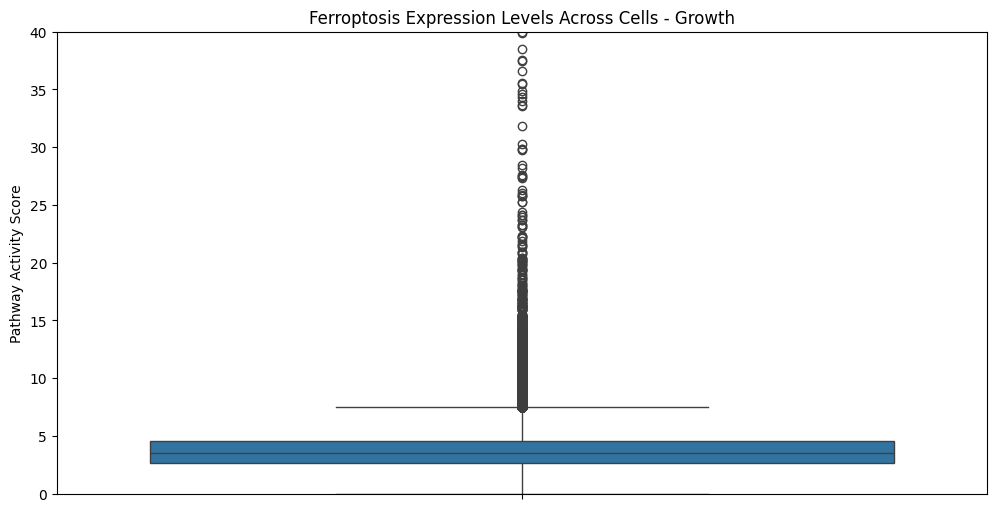

In [ ]:
# Select a subset of pathways to visualize
pathways_to_plot = pathway_activity_scores_healthy.columns[313:315]  # Adjust the slice as needed

# Plotting for Healthy dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=pathway_activity_scores_healthy['hsa04216']/healthy_avg)
plt.xticks(rotation=45)
plt.ylim((0,40))
plt.title('Ferroptosis Expression Levels Across Cells - Healthy')
plt.ylabel('Pathway Activity Score')
plt.show()

# Plotting for Cancer dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=pathway_activity_scores_growth['hsa04216']/growth_avg)
plt.xticks(rotation=45)
plt.ylim((0,40))
plt.title('Ferroptosis Expression Levels Across Cells - Growth')
plt.ylabel('Pathway Activity Score')
plt.show()